In [1]:
# concordance accuracy num neigh distribution of multi sample discovery VCFs

In [12]:
import joblib
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

d1 = joblib.load("s09_8x_stats.jl")
d1['coverage'] = '8x'
d2 = joblib.load("s09_16x_stats.jl")
d2['coverage'] = '16x'
d3 = joblib.load("s09_32x_stats.jl")
d3['coverage'] = '32x'

data = pd.concat([d1, d2, d3])
data = data[data['sample'] != 'HG00733']
data['Discordant'] += data['FN']
data['gt_concordance'] = data['Concordant'] / (data['Concordant'] + data['Discordant'])

def add_summary(data):
    data['as_compP'] = data['as_TP'] + data['as_FP']
    data['as_baseP'] = data['as_TP'] + data['as_FN']
    data['as_compN'] = data['as_TN'] + data['as_FN']
    data['as_baseN'] = data['as_TN'] + data['as_FP']
    data['as_ppv'] = data['as_TP'] / data['as_compP']
    data['as_tpr'] = data['as_TP'] / data['as_baseP']
    data['as_tnr'] = data['as_TN'] / data['as_baseN']
    data['as_npv'] = data['as_TN'] / data['as_compN']
    data['as_acc'] = (data['as_TP'] + data['as_TN']) / (data['as_baseP'] + data['as_baseN'])
    data['as_ba'] = (data['as_tpr'] + data['as_tnr']) / 2
    data['as_f1'] = 2 * ((data['as_ppv'] * data['as_tpr']) / (data['as_ppv'] + data['as_tpr']))
    
add_summary(data)

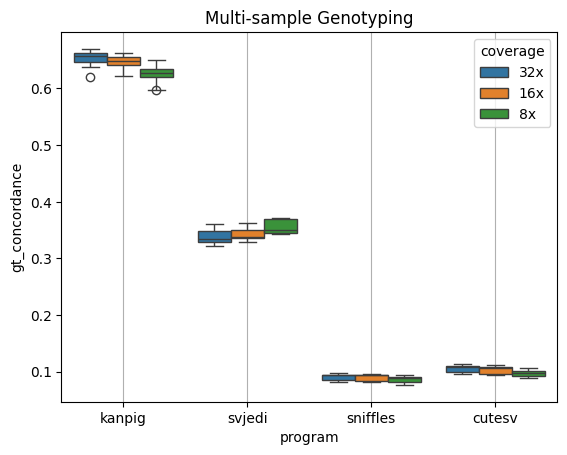

In [13]:
p = sb.boxplot(data=data, x="program", y="gt_concordance", hue="coverage", 
           hue_order=['32x', '16x', '8x'],
           order=['kanpig', 'svjedi', 'sniffles', 'cutesv'])
p.set(title="Multi-sample Genotyping")
plt.grid(axis='x')

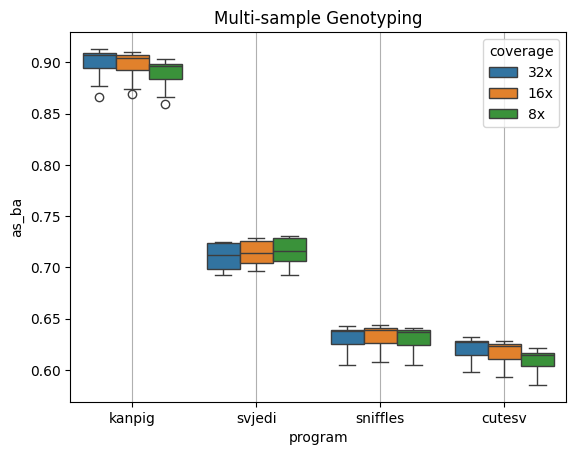

In [14]:
p = sb.boxplot(data=data, x="program", y="as_ba", hue="coverage", 
           hue_order=['32x', '16x', '8x'],
           order=['kanpig', 'svjedi', 'sniffles', 'cutesv'])
p.set(title="Multi-sample Genotyping")
plt.grid(axis='x')

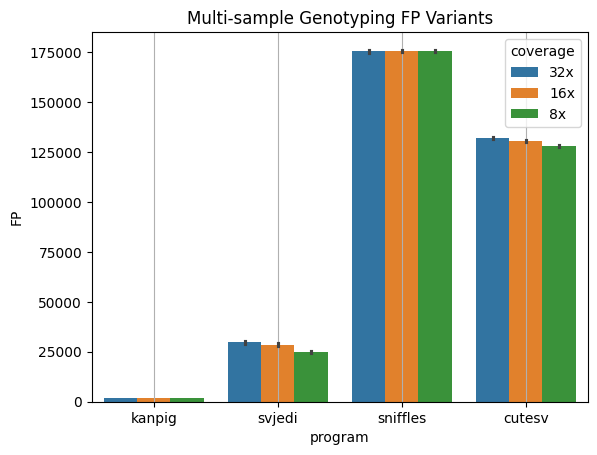

In [8]:
p = sb.barplot(data=data, x="program", y="FP", hue="coverage", 
           hue_order=['32x', '16x', '8x'],
           order=['kanpig', 'svjedi', 'sniffles', 'cutesv'])
p.set(title="Multi-sample Genotyping FP Variants")
plt.grid(axis='x')

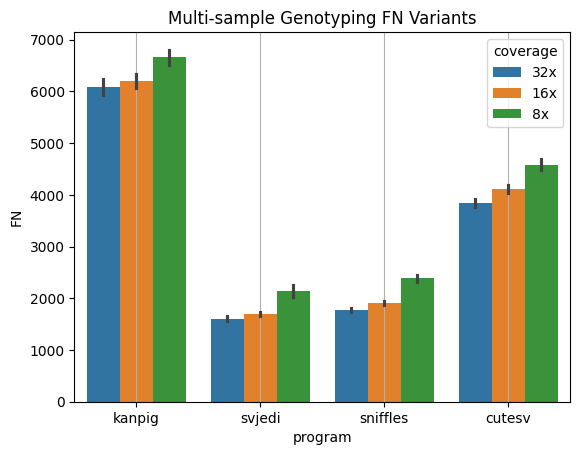

In [9]:
p = sb.barplot(data=data, x="program", y="FN", hue="coverage", 
           hue_order=['32x', '16x', '8x'],
           order=['kanpig', 'svjedi', 'sniffles', 'cutesv'])
p.set(title="Multi-sample Genotyping FN Variants")
plt.grid(axis='x')

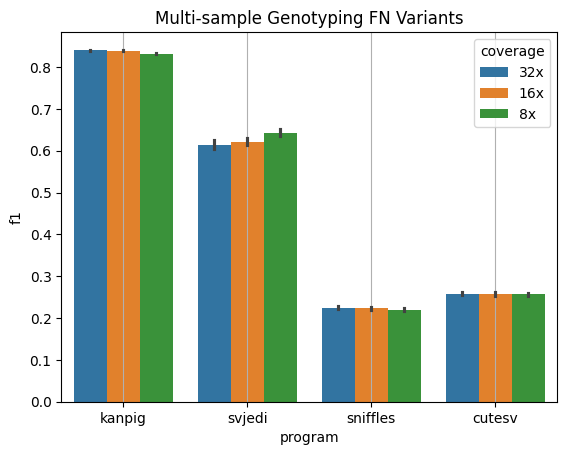

In [10]:
p = sb.barplot(data=data, x="program", y="f1", hue="coverage", 
           hue_order=['32x', '16x', '8x'],
           order=['kanpig', 'svjedi', 'sniffles', 'cutesv'])
p.set(title="Multi-sample Genotyping FN Variants")
plt.grid(axis='x')

<Axes: xlabel='program', ylabel='as_ba'>

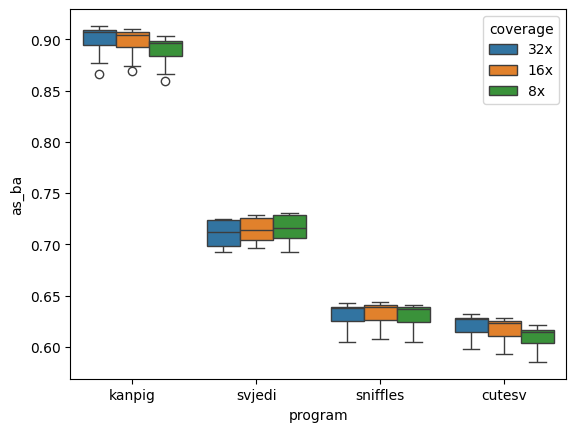

In [12]:
sb.boxplot(data=data, x="program", y="as_ba", hue="coverage", 
           hue_order=['32x', '16x', '8x'],
           order=['kanpig', 'svjedi', 'sniffles', 'cutesv'])

In [13]:
data.columns

Index(['TP-base', 'TP-comp', 'FP', 'FN', 'precision', 'recall', 'f1',
       'base cnt', 'comp cnt', 'gt_concordance', 'program', 'Concordant',
       'Discordant', 'Missing', 'Present FP', 'Present TP', 'gt_accuracy',
       'as_TP', 'as_TN', 'as_FP', 'as_FN', 'as_filtered', 'as_missing',
       'sample', 'coverage', 'as_compP', 'as_baseP', 'as_compN', 'as_baseN',
       'as_ppv', 'as_tpr', 'as_tnr', 'as_npv', 'as_acc', 'as_ba', 'as_f1'],
      dtype='object')

<Axes: xlabel='program', ylabel='as_ppv'>

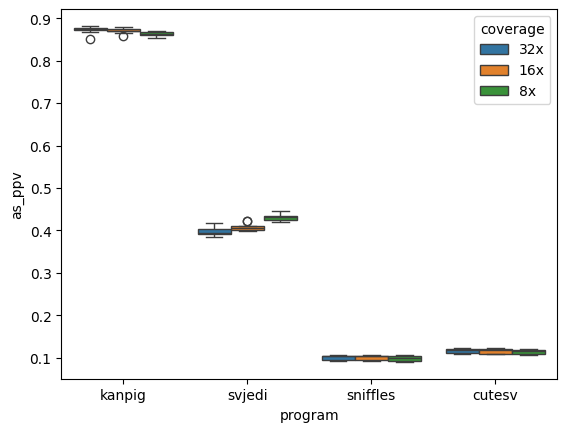

In [15]:
sb.boxplot(data=data, x="program", y="as_ppv", hue="coverage", 
           hue_order=['32x', '16x', '8x'],
           order=['kanpig', 'svjedi', 'sniffles', 'cutesv'])

<Axes: xlabel='program', ylabel='as_tpr'>

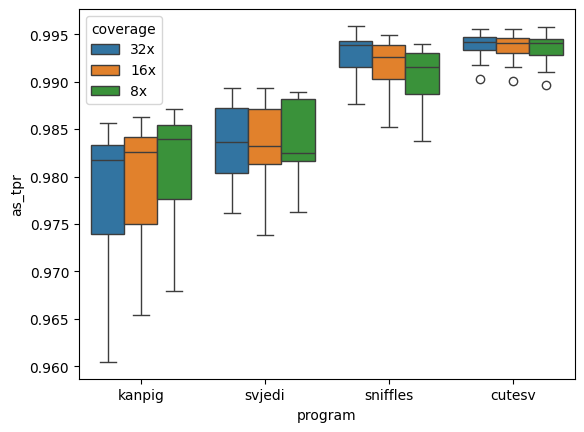

In [16]:
sb.boxplot(data=data, x="program", y="as_tpr", hue="coverage", 
           hue_order=['32x', '16x', '8x'],
           order=['kanpig', 'svjedi', 'sniffles', 'cutesv'])

<Axes: xlabel='program', ylabel='as_tnr'>

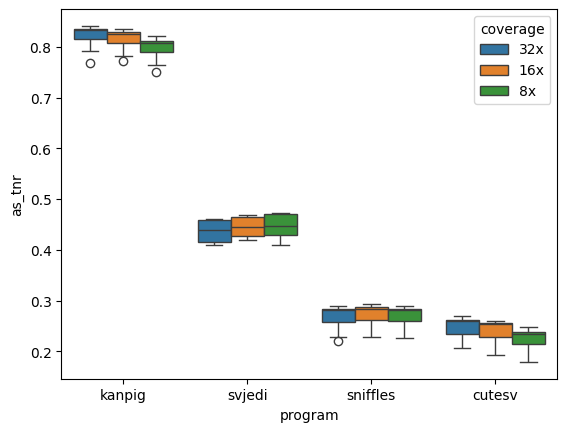

In [17]:
sb.boxplot(data=data, x="program", y="as_tnr", hue="coverage", 
           hue_order=['32x', '16x', '8x'],
           order=['kanpig', 'svjedi', 'sniffles', 'cutesv'])

<Axes: xlabel='program', ylabel='as_npv'>

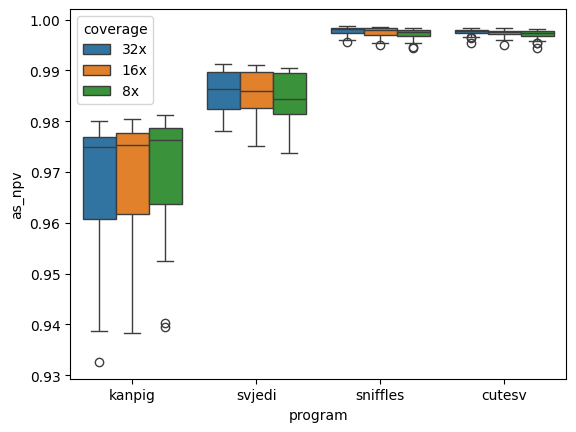

In [18]:
sb.boxplot(data=data, x="program", y="as_npv", hue="coverage", 
           hue_order=['32x', '16x', '8x'],
           order=['kanpig', 'svjedi', 'sniffles', 'cutesv'])